# Sheet

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.colors import LogNorm

from astropy.io import fits
from astropy.utils.data import download_file

import numpy as np

In [4]:
#image_file = download_file('http://data.astropy.org/tutorials/FITS-images/HorseHead.fits', cache=True )

image_file = download_file('http://www.astropy.org/astropy-data/l1448/l1448_13co.fits', cache=True )

#image_file = download_file('https://fits.gsfc.nasa.gov/samples/WFPC2u5780205r_c0fx.fits', cache=True )

In [5]:
with fits.open(image_file) as hdu_list:
    hdu_list.info()
    #image_data2 = hdu_list[1].data
    image_data = hdu_list[0].data

hop = hdu_list[0].header
# print(f"The info the HDU list: {hdu_list.info()}")
# print(f"The size of the 1st row of data: {np.shape(image_data)}")

Filename: /home/datalore/.astropy/cache/download/url/9357577de92bda8ab28fab631f62895c/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      25   (105, 105, 53)   float32   


In [6]:
hop

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                  105                                                  
NAXIS2  =                  105                                                  
NAXIS3  =                   53                                                  
WCSAXES =                    3 / Number of coordinate axes                      
CRPIX1  =               -799.0 / Pixel coordinate of reference point            
CRPIX2  =            -4741.913 / Pixel coordinate of reference point            
CRPIX3  =               -187.0 / Pixel coordinate of reference point            
CDELT1  =         -0.006388889 / [deg] Coordinate increment at reference point  
CDELT2  =          0.006388889 / [deg] Coordinate increment at reference point  
CDELT3  =             66.423

In [7]:
type(image_data)

numpy.ndarray

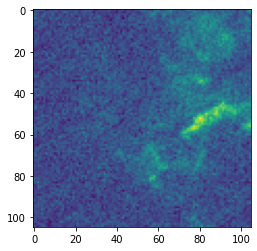

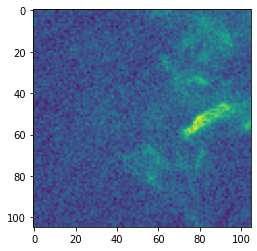

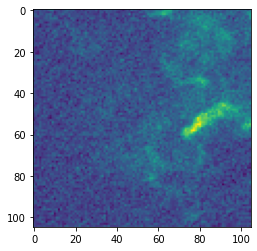

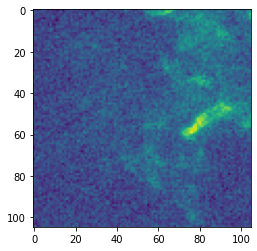

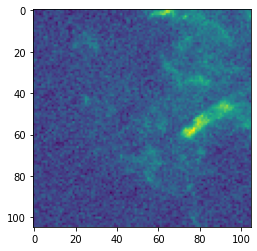

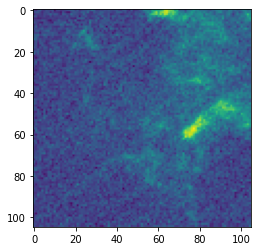

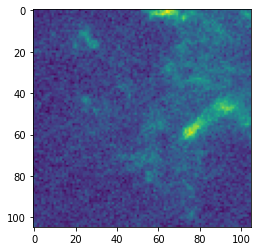

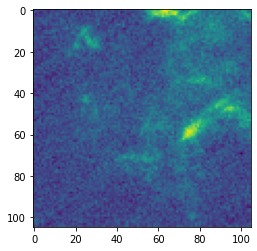

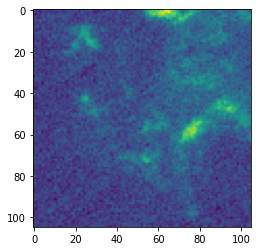

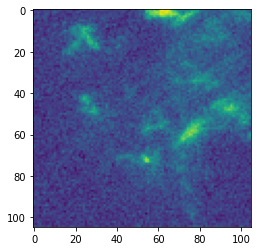

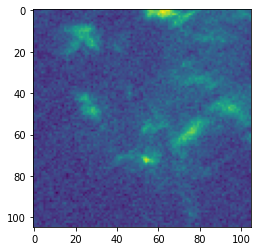

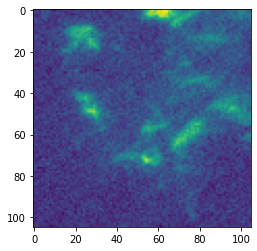

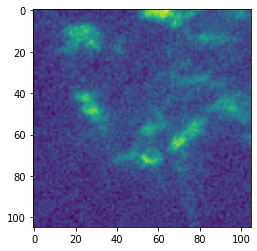

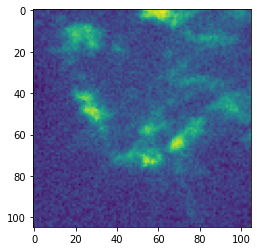

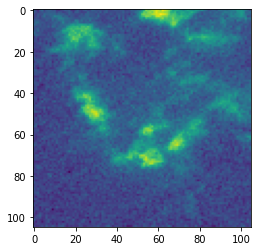

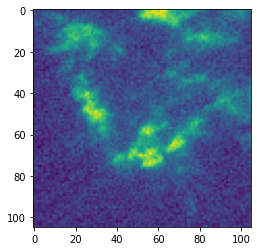

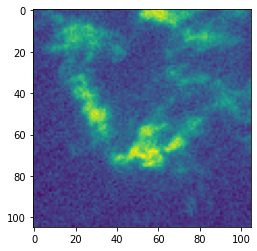

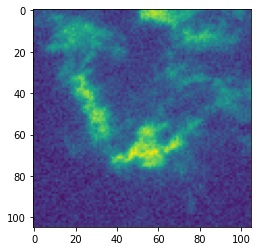

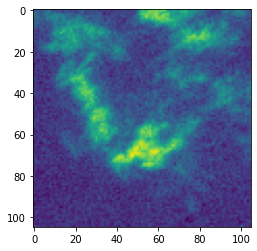

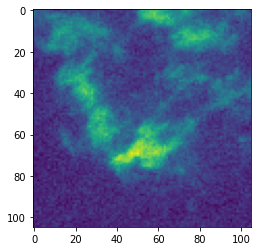

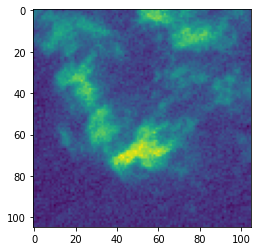

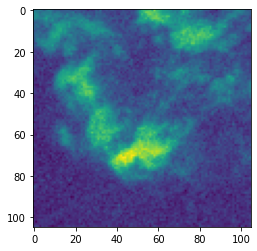

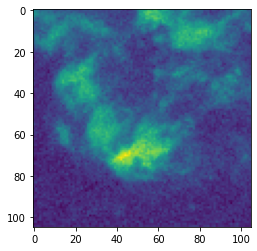

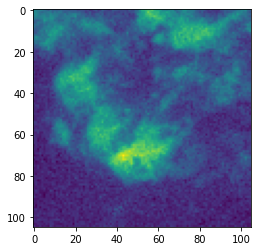

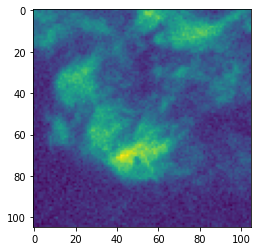

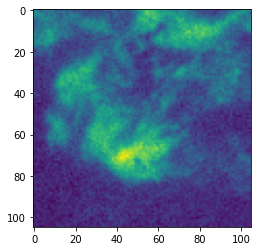

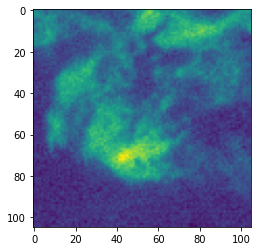

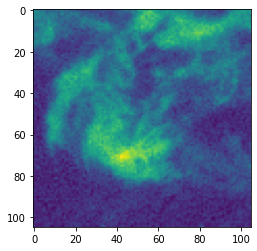

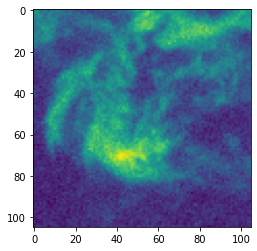

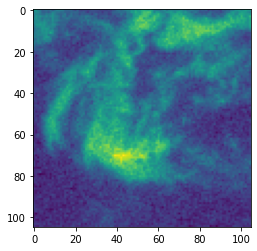

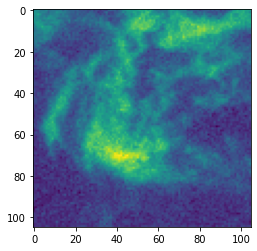

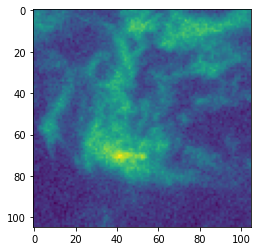

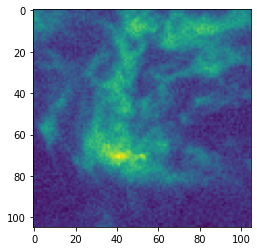

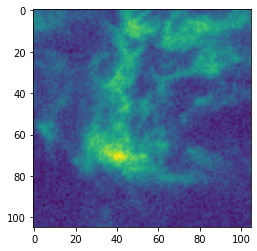

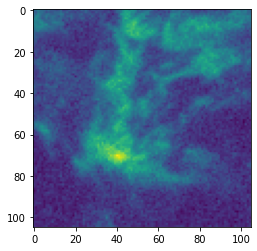

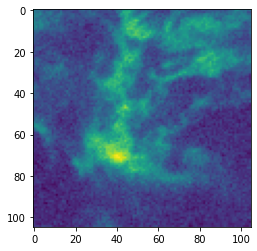

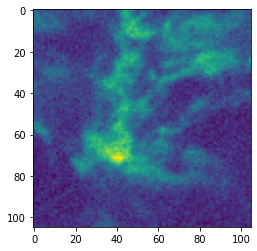

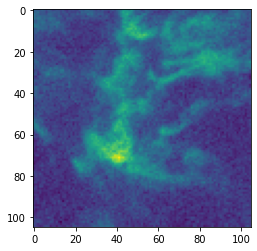

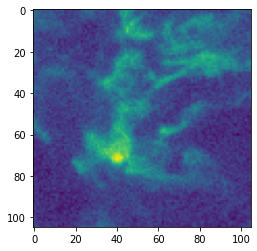

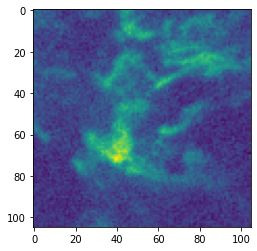

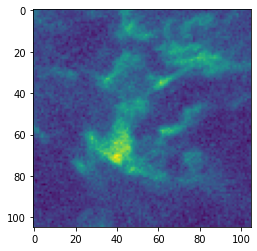

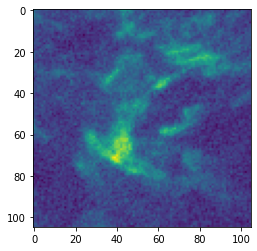

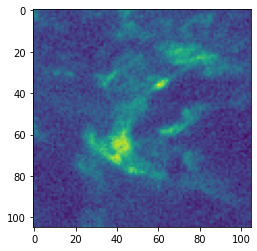

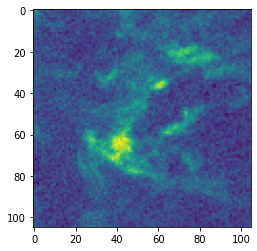

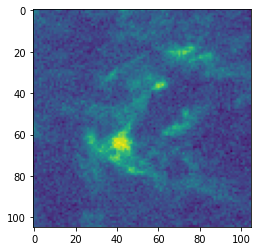

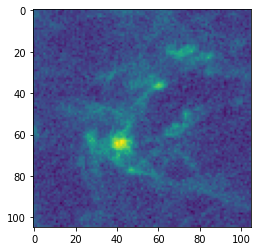

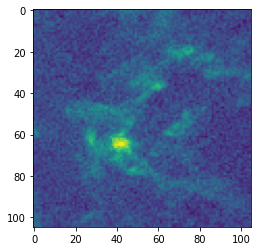

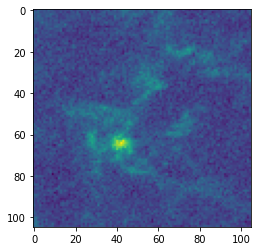

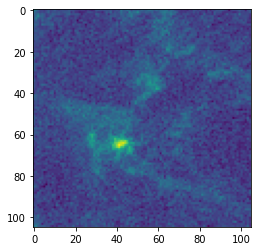

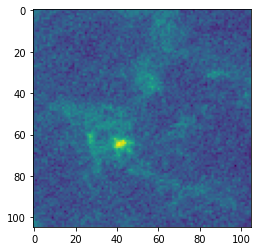

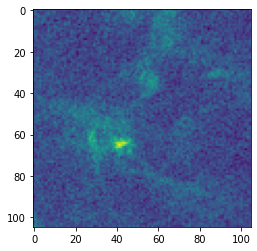

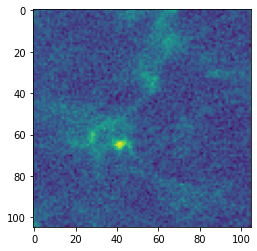

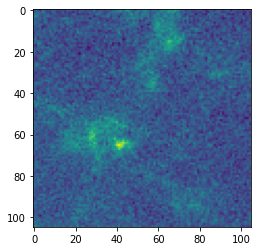

In [8]:
# The list below is for reference
plot_color_gradients = ['binary', 'gist_yarg', 'gist_gray', 'gray', 'bone',
                      'pink', 'spring', 'summer', 'autumn', 'winter', 'cool',
                      'Wistia', 'hot', 'afmhot', 'gist_heat', 'copper']

#plt.imshow(image_data, cmap='gray')
#plt.imshow((image_data[0])**2, cmap='binary')
#plt.imshow(100*(image_data[0])**3, cmap='binary')
# p1 = plt.imshow(100*(image_data[-1])**3, cmap='binary', norm=LogNorm(), interpolation='quadric')

# p2 = plt.imshow(100*(image_data[0])**3, cmap='binary', norm=LogNorm(), interpolation='quadric')

#plt.colorbar()

for i in range(len(image_data)):
    #print(type(image_data[i]))
    image = image_data[i]
    #plt.imshow(100 * image ** 3, cmap='binary', norm=LogNorm(), interpolation='quadric')
    plt.imshow(image)
    plt.show()

[Text(1, 5000.0, '5,000'),
 Text(1, 10000.0, '10,000'),
 Text(1, 20000.0, '20,000')]

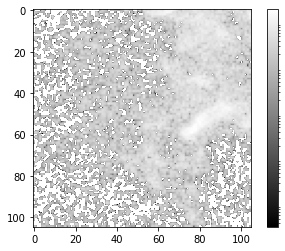

In [9]:
plt.imshow(image_data[3], cmap='gray', norm=LogNorm())

cbar = plt.colorbar(ticks=[5.e3,1.e4,2.e4])
cbar.ax.set_yticklabels(['5,000','10,000','20,000'])

In [10]:
image_file = download_file('https://fits.gsfc.nasa.gov/samples/WFPC2u5780205r_c0fx.fits', cache=True )

In [11]:
with fits.open(image_file) as hdu_list:
    hdu_list.info()
    image_data = hdu_list[0].data

Filename: /home/datalore/.astropy/cache/download/url/02780f6eddae504459a02d31d1ef7da5/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     262   (200, 200, 4)   float32   
  1  u5780205r_cvt.c0h.tab    1 TableHDU       353   4R x 49C   [D25.17, D25.17, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, A1, E15.7, I12, I12, D25.17, D25.17, A8, A8, I12, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, I12, I12, I12, I12, I12, I12, I12, I12, A48, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7]   


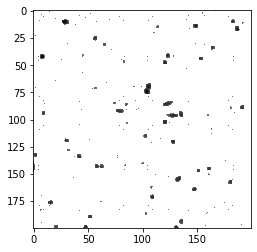

In [12]:
#plt.imshow(image_data[0], cmap='binary')
plt.imshow(100*(image_data[0])**3, cmap='binary', norm=LogNorm(), interpolation='quadric')

# Sheet 2

In [13]:
import pylab as pl
import numpy as np
from astropy.visualization import quantity_support
from astropy import units as u
from astropy import wcs

# set so that these display properly on black backgrounds
pl.rcParams['figure.facecolor']='w'

from spectral_cube import SpectralCube

from pvextractor import extract_pv_slice, Path

import numpy as np

ModuleNotFoundError: ModuleNotFoundError: No module named 'pvextractor'

In [ ]:
cube = SpectralCube.read('http://www.astropy.org/astropy-data/l1448/l1448_13co.fits')

print(f"The size of the cube is: {np.shape(cube)}")
print(f"The cube itself is: {cube}")

The size of the cube is: (53, 105, 105)
The cube itself is: SpectralCube with shape=(53, 105, 105):
 n_x:    105  type_x: RA---SFL  unit_x: deg    range:    50.924417 deg:   51.740103 deg
 n_y:    105  type_y: DEC--SFL  unit_y: deg    range:    30.301945 deg:   30.966389 deg
 n_s:     53  type_s: VOPT      unit_s: m / s  range:     2528.195 m / s:    5982.223 m / s


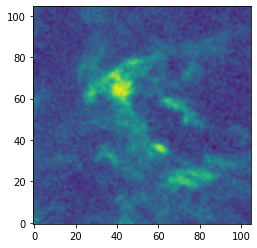

In [ ]:
# pl.imshow(cube[43].value, origin='lower')
# pl.imshow(cube[43].value, origin='lower', interpolation='hamming')
pl.imshow(cube[43].value, origin='lower', interpolation='quadric')

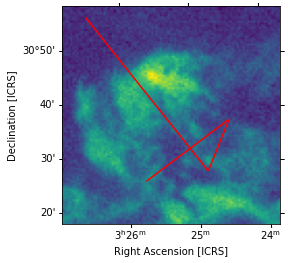

In [ ]:
path = Path([(40,20), (80,50), (70,25), (10, 100)])
ax = pl.subplot(111, projection=cube.wcs.celestial)
ax.imshow(cube[26].value)
path.show_on_axis(ax, spacing=1, color='r')
ax.set_xlabel(f"Right Ascension [{cube.wcs.wcs.radesys}]")
ax.set_ylabel(f"Declination [{cube.wcs.wcs.radesys}]")

# Sheet 3

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.colors import LogNorm

from astropy.io import fits
from astropy.utils.data import download_file

import numpy as np

In [3]:
# Importing libraries for showing multiple images
import glob
import cv2

In [4]:
image_file = download_file('http://data.astropy.org/tutorials/FITS-images/HorseHead.fits', cache=True )

In [5]:
with fits.open(image_file) as hdu_list:
    hdu_list.info()
    image_data = hdu_list[0].data
    image2 = hdu_list[1].data
# print(f"The size of the 1st row of data: {np.shape(image_data)}")

Filename: /home/datalore/.astropy/cache/download/url/ff6e0b93871033c68022ca026a956d87/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


In [6]:
header_output = hdu_list[0].header
header_output

SIMPLE  =                    T /FITS: Compliance                                
BITPIX  =                   16 /FITS: I*2 Data                                  
NAXIS   =                    2 /FITS: 2-D Image Data                            
NAXIS1  =                  891 /FITS: X Dimension                               
NAXIS2  =                  893 /FITS: Y Dimension                               
EXTEND  =                    T /FITS: File can contain extensions               
DATE    = '2014-01-09        '  /FITS: Creation Date                            
ORIGIN  = 'STScI/MAST'         /GSSS: STScI Digitized Sky Survey                
SURVEY  = 'SERC-ER '           /GSSS: Sky Survey                                
REGION  = 'ER768   '           /GSSS: Region Name                               
PLATEID = 'A0JP    '           /GSSS: Plate ID                                  
SCANNUM = '01      '           /GSSS: Scan Number                               
DSCNDNUM= '00      '        

In [7]:
for i in header_output:
    print(f"The {header_output.index(i)}-th of the 1st header is: {i}")

The 0-th of the 1st header is: SIMPLE
The 1-th of the 1st header is: BITPIX
The 2-th of the 1st header is: NAXIS
The 3-th of the 1st header is: NAXIS1
The 4-th of the 1st header is: NAXIS2
The 5-th of the 1st header is: EXTEND
The 6-th of the 1st header is: DATE
The 7-th of the 1st header is: ORIGIN
The 8-th of the 1st header is: SURVEY
The 9-th of the 1st header is: REGION
The 10-th of the 1st header is: PLATEID
The 11-th of the 1st header is: SCANNUM
The 12-th of the 1st header is: DSCNDNUM
The 13-th of the 1st header is: TELESCID
The 14-th of the 1st header is: BANDPASS
The 15-th of the 1st header is: COPYRGHT
The 16-th of the 1st header is: SITELAT
The 17-th of the 1st header is: SITELONG
The 18-th of the 1st header is: TELESCOP
The 19-th of the 1st header is: INSTRUME
The 20-th of the 1st header is: EMULSION
The 21-th of the 1st header is: FILTER
The 22-th of the 1st header is: PLTSCALE
The 23-th of the 1st header is: PLTSIZEX
The 24-th of the 1st header is: PLTSIZEY
The 25-th of 

In [8]:
header_output.comments["BANDPASS"]

'GSSS: Bandpass Code'

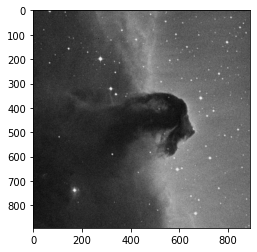

In [9]:
plt.imshow(image_data, cmap='gray')

In [10]:
print(type(image_data))

<class 'numpy.ndarray'>


In [11]:
import cv2 as cv

In [15]:
wind_name = 'img'

cv.imshow(wind_name, image_data)

cv.waitKey(0)
cv.destroyAllWindows()

error: error: OpenCV(4.5.4) /tmp/pip-req-build-khv2fx3p/opencv/modules/highgui/src/window.cpp:1274: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


# Sheet 4

In [ ]:
import pathlib

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import astropy.units as u
from astropy.table import Table
from dust_extinction.parameter_averages import CCM89, F99
from synphot import units, config
from synphot import SourceSpectrum,SpectralElement,Observation,ExtinctionModel1D
from synphot.models import BlackBodyNorm1D
from synphot.spectrum import BaseUnitlessSpectrum
from synphot.reddening import ExtinctionCurve
from astroquery.simbad import Simbad
from astroquery.mast import Observations
import astropy.visualization

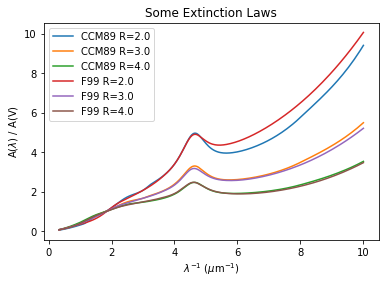

In [ ]:
# Create wavelengths array.
wav = np.arange(0.1, 3.0, 0.001)*u.micron

for model in [CCM89, F99]:
    for R in (2.0,3.0,4.0):
        # Initialize the extinction model
        ext = model(Rv=R)
        plt.plot(1/wav, ext(wav), label=model.name+' R='+str(R))
        
plt.xlabel('$\lambda^{-1}$ ($\mu$m$^{-1}$)')
plt.ylabel('A($\lambda$) / A(V)')
plt.legend(loc='best')
plt.title('Some Extinction Laws')
plt.show()

# Sheet 5

In [ ]:
import csv

In [ ]:
with open("MAST_Advanced_Search_1.csv") as csvf:
    csvr = csv.reader(csvf, delimiter=',')
    for r in csvr:
        print(r)

['#The following lines beginning with # are comments. Readable columns names and datatypes are provided as informational comment lines in addition to the database column names.']
['#If you want to re-upload this table import it as a MAST Result with these header lines unmodified.']
['#Observation Type', ' Mission', ' Provenance Name', ' Instrument', ' Project', ' Filters', ' Waveband', ' Target Name', ' Target Classification', ' Observation ID', ' RA', ' Dec', ' Calibration Level', ' Start Time', ' Exposure Length', ' Release Date', ' Proposal Type']
['#@string', ' string', ' string', ' string', ' string', ' string', ' string', ' string', ' string', ' string', ' ra', ' dec', ' int', ' float', ' float', ' float', ' string']
['intentType', 'obs_collection', 'provenance_name', 'instrument_name', 'project', 'filters', 'wavelength_region', 'target_name', 'target_classification', 'obs_id', 's_ra', 's_dec', 'calib_level', 't_min', 't_exptime', 't_obs_release', 'proposal_type']
['science', 'JW

# Sheet 6

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.colors import LogNorm

from astropy.io import fits
from astropy.utils.data import download_file

import numpy as np